# Time Series: Stock Price

For this project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X. You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

In [1]:
# First, import the relevant modules
import requests
import json
import pandas as pd
import os
import matplotlib.pyplot as plt

## Download using Quandl API <a href='#ref1'>[1]</a>

In [35]:
url = "https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json" # FSE - database name, AFX_X - dataset name
API_KEY = 'ChHht3EzsUvEPnxUxwZb' #'MY_API_KEY_IS_SECRET'
#params = dict(start_date='2017-01-01', end_date='2017-12-31', api_key=API_KEY)
params = dict(api_key=API_KEY)
res = requests.get(url, params=params)
print(res)
json = res.json()
print(json)

<Response [200]>
{'dataset': {'id': 10095370, 'dataset_code': 'AFX_X', 'database_code': 'FSE', 'name': 'Carl Zeiss Meditec (AFX_X)', 'description': 'Stock Prices for Carl Zeiss Meditec (2020-11-02) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE0005313704', 'refreshed_at': '2020-12-01T14:48:09.907Z', 'newest_available_date': '2020-12-01', 'oldest_available_date': '2000-06-07', 'column_names': ['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'], 'frequency': 'daily', 'type': 'Time Series', 'premium': False, 'limit': None, 'transform': None, 'column_index': None, 'start_date': '2000-06-07', 'end_date': '2020-12-01', 'data': [['2020-12-01', 112.2, 112.2, 111.5, 112.0, None, 51.0, 5703.0, None, None, None], ['2020-11-30', 111.0, 113.6, 111.0, 112.1, None, 315.0, 35111.5, None, None, None], ['2020-11-27', 111.0, 111.5, 109.5, 111.2, None, 155.0, 17168.5, None, None, N

In [152]:
pydict = dict(json) # Convert the returned JSON object into a Python dictionary
data = pydict['dataset']['data'] # data for all days
df = pd.DataFrame(data) # convert to pandas dataframe
df.columns = pydict['dataset']['column_names'] # set column names
df.head()

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2020-12-01,112.2,112.2,111.5,112.0,NaN,51.0,5703.0,None,None,NaN
1,2020-11-30,111.0,113.6,111.0,112.1,NaN,315.0,35111.5,None,None,NaN
2,2020-11-27,111.0,111.5,109.5,111.2,NaN,155.0,17168.5,None,None,NaN
3,2020-11-26,111.3,112.0,110.5,111.6,NaN,254.0,28367.5,None,None,NaN
4,2020-11-25,111.4,111.4,110.1,110.1,NaN,294.0,32435.8,None,None,NaN


In [153]:
df.shape

(5268, 11)

In [154]:
print("No. of empty rows in each column")
print("Open:", df['Open'].isna().sum())
print("High:", df['High'].isna().sum())
print("Low:", df['Low'].isna().sum())
print("Close:", df['Close'].isna().sum())
print("Change:", df['Change'].isna().sum()) # drop it
print("Traded Volume:", df['Traded Volume'].isna().sum())
print("Turnover:", df['Turnover'].isna().sum())
print("Last Price of the Day:", df['Last Price of the Day'].isna().sum()) # drop it
print("Daily Traded Units:", df['Daily Traded Units'].isna().sum()) # drop it
print("Daily Turnover", df['Daily Turnover'].isna().sum())

No. of empty rows in each column
Open: 732
High: 401
Low: 401
Close: 0
Change: 5259
Traded Volume: 46
Turnover: 1355
Last Price of the Day: 5268
Daily Traded Units: 5268
Daily Turnover 3959


In [155]:
df['Daily Turnover'].unique() # drop it

array([nan,  0.])

In [156]:
df.drop(['Change','Last Price of the Day','Daily Traded Units','Daily Turnover'], axis=1, inplace=True) # drop columns that are mostly empty
# inplace=True to drop column names
df.set_index('Date')

,Open,High,Low,Close,Traded Volume,Turnover
Date,,,,,,
2020-12-01,112.2,112.2,111.5,112.0,51.0,5703.0
2020-11-30,111.0,113.6,111.0,112.1,315.0,35111.5
2020-11-27,111.0,111.5,109.5,111.2,155.0,17168.5
2020-11-26,111.3,112.0,110.5,111.6,254.0,28367.5
2020-11-25,111.4,111.4,110.1,110.1,294.0,32435.8
...,...,...,...,...,...,...
2000-06-13,NaN,NaN,NaN,45.0,0.0,NaN
2000-06-12,NaN,NaN,NaN,45.0,0.0,NaN
2000-06-09,NaN,NaN,NaN,45.0,0.0,NaN


In [157]:
df.head()

,Date,Open,High,Low,Close,Traded Volume,Turnover
0,2020-12-01,112.2,112.2,111.5,112.0,51.0,5703.0
1,2020-11-30,111.0,113.6,111.0,112.1,315.0,35111.5
2,2020-11-27,111.0,111.5,109.5,111.2,155.0,17168.5
3,2020-11-26,111.3,112.0,110.5,111.6,254.0,28367.5
4,2020-11-25,111.4,111.4,110.1,110.1,294.0,32435.8


In [8]:
os.chdir('C:/Sereda/Lectures/Springboard/Projects/Capstone2')

In [166]:
df.to_csv('FSE.AFX_X.csv', index=False)

#### Open saved data and convert into time series

In [2]:
os.chdir('C:/Sereda/Lectures/Springboard/Projects/7.6.Capstone2_Data_Wrangling')
df = pd.read_csv('FSE.AFX_X.csv')
print(df.columns)
print(df.head())

Index(['unique_id', 'Date', 'Open', 'High', 'Low', 'Close', 'Traded Volume',
       'Turnover'],
      dtype='object')
   unique_id        Date   Open   High    Low  Close  Traded Volume  Turnover
0          0   12/1/2020  112.2  112.2  111.5  112.0           51.0    5703.0
1          1  11/30/2020  111.0  113.6  111.0  112.1          315.0   35111.5
2          2  11/27/2020  111.0  111.5  109.5  111.2          155.0   17168.5
3          3  11/26/2020  111.3  112.0  110.5  111.6          254.0   28367.5
4          4  11/25/2020  111.4  111.4  110.1  110.1          294.0   32435.8


In [36]:
# Inspect data types and completeness
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   unique_id      5268 non-null   int64  
 1   Date           5268 non-null   object 
 2   Open           4536 non-null   float64
 3   High           4867 non-null   float64
 4   Low            4867 non-null   float64
 5   Close          5268 non-null   float64
 6   Traded Volume  5222 non-null   float64
 7   Turnover       3913 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 329.4+ KB


In [3]:
# Convert the date column to datetime64
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   unique_id      5268 non-null   int64         
 1   Date           5268 non-null   datetime64[ns]
 2   Open           4536 non-null   float64       
 3   High           4867 non-null   float64       
 4   Low            4867 non-null   float64       
 5   Close          5268 non-null   float64       
 6   Traded Volume  5222 non-null   float64       
 7   Turnover       3913 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 329.4 KB


To convert object into Time Series, set the date column as index. Many Series/DataFrame methods rely on time information in the index to provide time-series functionality.

In [4]:
# Set date column as index
df.set_index('Date', inplace=True)
df.head()

,unique_id,Open,High,Low,Close,Traded Volume,Turnover
Date,,,,,,,
2020-12-01,0,112.2,112.2,111.5,112.0,51.0,5703.0
2020-11-30,1,111.0,113.6,111.0,112.1,315.0,35111.5
2020-11-27,2,111.0,111.5,109.5,111.2,155.0,17168.5
2020-11-26,3,111.3,112.0,110.5,111.6,254.0,28367.5
2020-11-25,4,111.4,111.4,110.1,110.1,294.0,32435.8


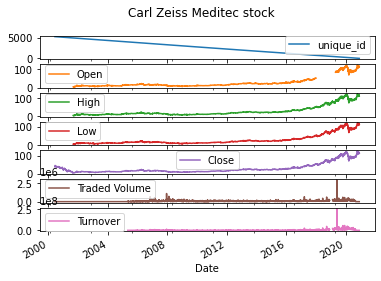

In [39]:
# Plot data
df.plot(title='Carl Zeiss Meditec stock', subplots=True);
plt.show()

#### Filter columns

Let's focus on closing stock price, 'Close'.

In [40]:
type(df)

pandas.core.frame.DataFrame

In [5]:
TS = df.drop(['unique_id', 'Open','High','Low', 'Traded Volume','Turnover'], axis=1, inplace=False) # drop columns not used in analysis
TS = TS.sort_values(by=['Date']) # sort by date
TS.head()

,Close
Date,
2000-06-07,38.0
2000-06-08,38.0
2000-06-09,45.0
2000-06-12,45.0
2000-06-13,45.0


In [42]:
TS.index

DatetimeIndex(['2000-06-07', '2000-06-08', '2000-06-09', '2000-06-12',
               '2000-06-13', '2000-06-14', '2000-06-15', '2000-06-16',
               '2000-06-19', '2000-06-20',
               ...
               '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-23',
               '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-30', '2020-12-01'],
              dtype='datetime64[ns]', name='Date', length=5268, freq=None)

In [43]:
print(type(df))
print(type(TS))
print(type(TS.index))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [40]:
#TS.columns = ['ds','y'] # rename columns

In [44]:
TS.describe() # Descriptive statistics

,Close
count,5268.000000
mean,27.515420
std,25.430039
min,4.070000
25%,11.590000
50%,17.250000
75%,28.935000
max,123.200000


SD is quite high - volatile stock.

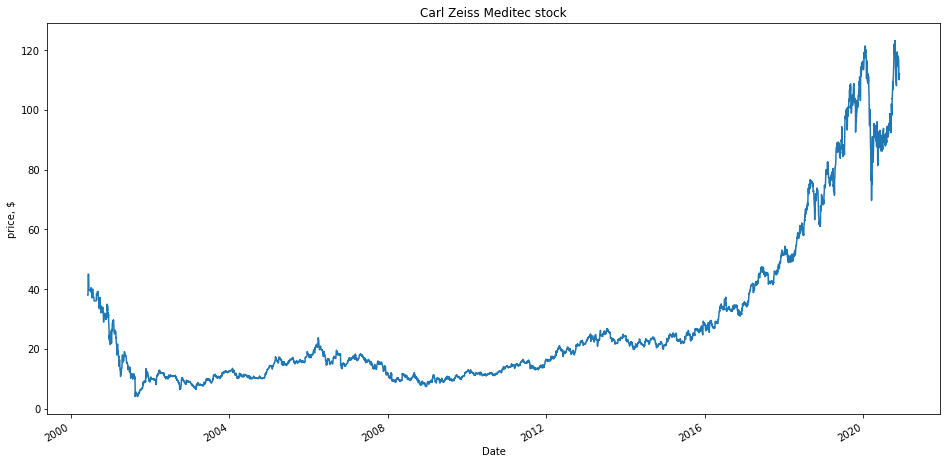

In [7]:
_ = TS.Close.plot(title='Carl Zeiss Meditec stock', figsize=[16,8])
_ = plt.ylabel('price, $')
plt.show()

In [47]:
type(TS.Close)

pandas.core.series.Series

#### Partial string indexing
To select subsets of your time series, you can use strings that represent a complete date, or relevant parts of a date.
If you just pass a string representing a year, pandas returns all dates within this year.

In [48]:
df.Close['2015-02']

Date
2015-02-27    24.57
2015-02-26    24.55
2015-02-25    24.72
2015-02-24    24.60
2015-02-23    24.55
2015-02-20    24.60
2015-02-19    24.70
2015-02-18    24.81
2015-02-17    24.50
2015-02-16    24.98
2015-02-13    24.75
2015-02-12    24.93
2015-02-11    24.16
2015-02-10    23.83
2015-02-09    23.56
2015-02-06    23.90
2015-02-05    24.50
2015-02-04    23.86
2015-02-03    23.99
2015-02-02    23.18
Name: Close, dtype: float64

In [50]:
TS.head()

,Close
Date,
2000-06-07,38.0
2000-06-08,38.0
2000-06-09,45.0
2000-06-12,45.0
2000-06-13,45.0


In [51]:
TS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5268 entries, 2000-06-07 to 2020-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5268 non-null   float64
dtypes: float64(1)
memory usage: 82.3 KB


Note that the date range is <b>inclusive of the end date</b>, unlike other intervals in Python.

In [52]:
TS.Close['2016'] # Pass string for part of date

Date
2016-01-01    28.55
2016-01-04    27.96
2016-01-05    28.21
2016-01-06    28.15
2016-01-07    26.98
              ...  
2016-12-26    35.03
2016-12-27    35.41
2016-12-28    35.30
2016-12-29    34.94
2016-12-30    35.00
Name: Close, Length: 260, dtype: float64

In [53]:
ts = TS['2015-3': '2016-2'] # Slice of time
ts

,Close
Date,
2015-03-02,24.50
2015-03-03,24.02
2015-03-04,24.15
2015-03-05,24.12
2015-03-06,24.09
...,...
2016-02-23,28.58
2016-02-24,29.21
2016-02-25,29.12


In [54]:
ts.info() # Slice includes last month

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257 entries, 2015-03-02 to 2016-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   257 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [55]:
TS.loc['2016-6-1', 'Close']

35.08

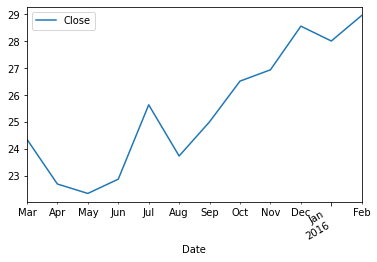

In [56]:
# Set frequency to monthly
mo = ts.asfreq('M', method='bfill') # without filling, when there is no data for the last day of the month, would have NULL

# Plot monthly data
mo.plot(subplots=True);
plt.show()

In [8]:
TS.to_csv('TS_stock.csv') # save to *.csv

TS time series is ready for analysis ...

## 11.5 Capstone Two: EDA
https://www.springboard.com/workshops/data-science-career-track/learn#/curriculum/18764

In [4]:
os.chdir('C:/Sereda/Lectures/Springboard/Projects/7.6.Capstone2_Data_Wrangling')
TS = pd.read_csv('TS_stock.csv')
print(TS.columns)
print(TS.head())
print(TS.tail())

Index(['Date', 'Close'], dtype='object')
         Date  Close
0  2000-06-07   38.0
1  2000-06-08   38.0
2  2000-06-09   45.0
3  2000-06-12   45.0
4  2000-06-13   45.0
            Date  Close
5263  2020-11-25  110.1
5264  2020-11-26  111.6
5265  2020-11-27  111.2
5266  2020-11-30  112.1
5267  2020-12-01  112.0


In [4]:
TS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5268 non-null   object 
 1   Close   5268 non-null   float64
dtypes: float64(1), object(1)
memory usage: 82.4+ KB


In [5]:
import numpy as np
import seaborn
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

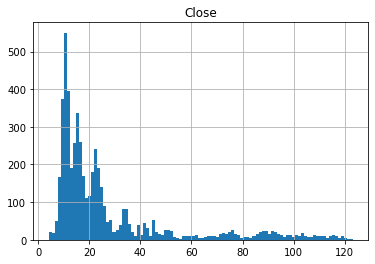

In [6]:
# Histogram
TS.hist(bins=100);

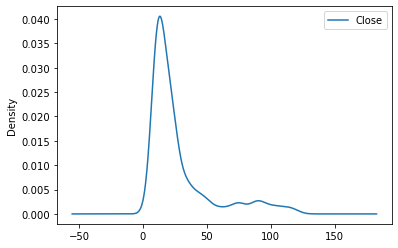

In [9]:
# Kernel Density Plot (smoothed version of a histogram)
TS.plot(kind='kde');

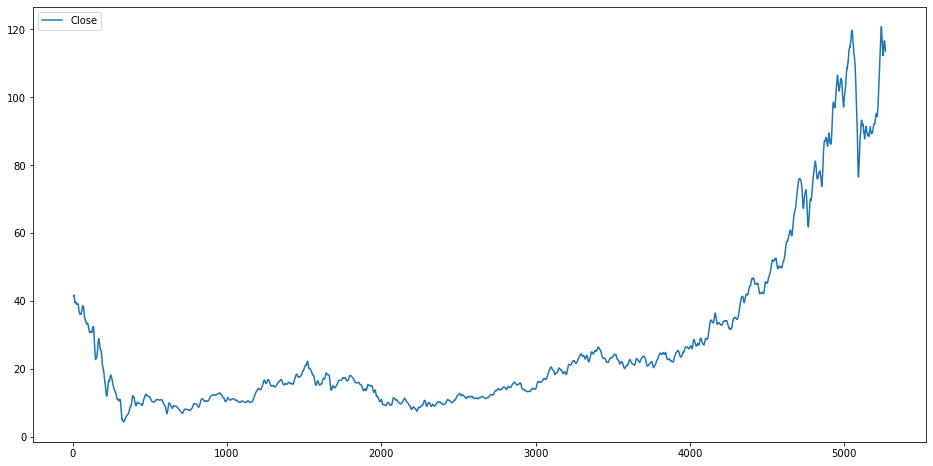

In [68]:
# Moving Average
TS_MA = TS.rolling(10, win_type=None).mean()
TS_MA.plot(style=['-'], figsize=[16,8]);

C:\Programs\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


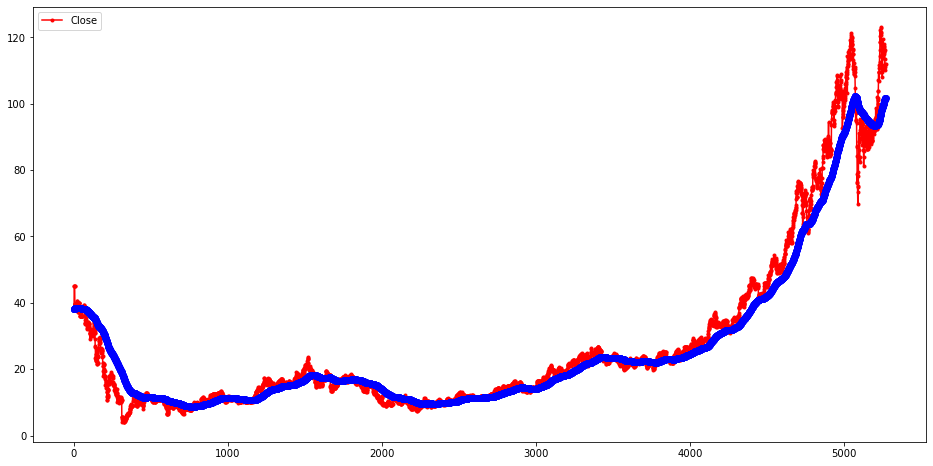

In [6]:
# Exponential Smoothing
model = SimpleExpSmoothing(TS.Close).fit(smoothing_level=.01, optimized=False)

TS.plot(marker='.', color='r');
model.fittedvalues.plot(marker='o', color='b', figsize=[16,8]);

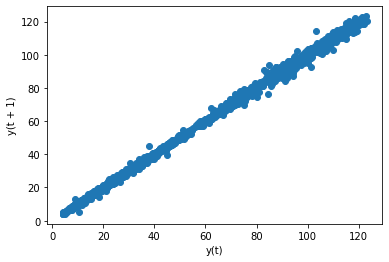

In [7]:
# Lag plot (check if the time series is random)
from pandas.plotting import lag_plot
lag_plot(TS.Close);

Lag plot has a linear trend, meaning the data are not random and autoregressive model is suitable.

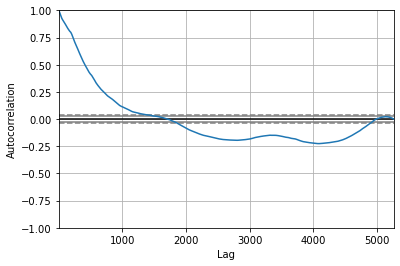

In [8]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(TS.Close);

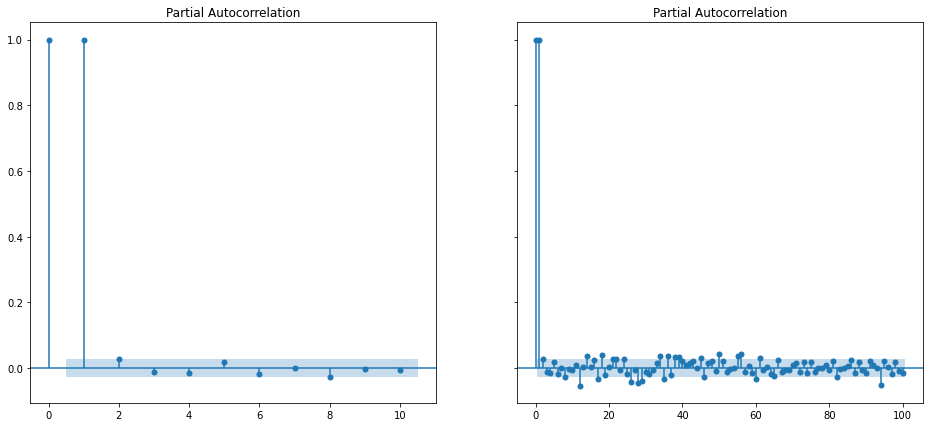

In [9]:
# Partial Autocorrelation
from pandas import Series
from statsmodels.graphics.tsaplots import plot_pacf
# Create a figure and an array of axes: 1 row, 2 columns with shared y axis
fig, ax = plt.subplots(1, 2, sharey=True, figsize=[16,7]);
plot_pacf(TS.Close, lags=10, ax = ax[0])
plot_pacf(TS.Close, lags=100, ax = ax[1])
plt.show()

### What is the difference in stock prices between two consecutive  business days?

In [10]:
# Extract weekday prices
TS_Monday = pd.DataFrame([], columns=['Date','Close']);
TS_Tuesday = pd.DataFrame([], columns=['Date','Close']);
TS_Wednesday = pd.DataFrame([], columns=['Date','Close']);
TS_Thursday = pd.DataFrame([], columns=['Date','Close']);
TS_Friday = pd.DataFrame([], columns=['Date','Close']);
for d in range(len(TS)):
    Date_Close = TS.iloc[d]
    Date = Date_Close.Date
    Close = Date_Close.Close
    day_of_week = pd.Timestamp(Date).day_name()
    #print(Date,Close,day_of_week)
    if day_of_week == 'Monday':
       TS_Monday = TS_Monday.append({'Date':Date, 'Close':Close}, ignore_index = True)
    elif day_of_week == 'Tuesday':
       TS_Tuesday = TS_Tuesday.append({'Date':Date, 'Close':Close}, ignore_index = True)
    elif day_of_week == 'Wednesday':
       TS_Wednesday = TS_Wednesday.append({'Date':Date, 'Close':Close}, ignore_index = True)
    elif day_of_week == 'Thursday':
       TS_Thursday = TS_Thursday.append({'Date':Date, 'Close':Close}, ignore_index = True)
    elif day_of_week == 'Friday':
       TS_Friday = TS_Friday.append({'Date':Date, 'Close':Close}, ignore_index = True)

In [11]:
print(TS_Monday)
#print(TS_Tuesday)
#print(TS_Wednesday)
#print(TS_Thursday)
#print(TS_Friday)

            Date   Close
0     2000-06-12   45.00
1     2000-06-19   39.64
2     2000-06-26   39.51
3     2000-07-03   39.51
4     2000-07-10   39.00
...          ...     ...
1042  2020-11-02  108.10
1043  2020-11-09  119.40
1044  2020-11-16  118.10
1045  2020-11-23  116.30
1046  2020-11-30  112.10

[1047 rows x 2 columns]


Comparison of histograms shows that daily closing prices for all week days have same non-normal distribution.

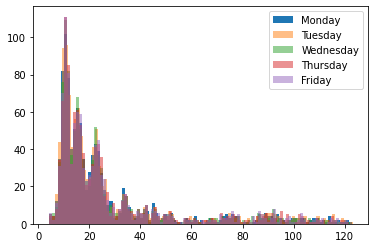

In [267]:
# Stock prices on different week days have same non-normal distribution
plt.hist(TS_Monday.Close, bins=100);
plt.hist(TS_Tuesday.Close, bins=100, alpha=0.5);
plt.hist(TS_Wednesday.Close, bins=100, alpha=0.5);
plt.hist(TS_Thursday.Close, bins=100, alpha=0.5);
plt.hist(TS_Friday.Close, bins=100, alpha=0.5);
plt.legend(['Monday','Tuesday','Wednesday','Thursday','Friday']);

Therefore, let's study the price changes on the next business day, which are more representative since they are taken within the same week or beginning on the next week, unlike daily prices that are collected over the entire history.

In [13]:
def diff_TS(TS1, TS2, days_diff):
    """Difference of two time series for constant offset days_diff, accounting for the gaps.
    TS1: first time series
    TS2: later time series
    days_diff: no. of days difference in TS2-TS1, >= 0
    Assumptions: 1st column is date, 2nd column is value of interest."""
    # initial difference of times
    i1 = 0; i2 = 0; # initial indexes in TS1 and TS2
    diff = pd.DataFrame([], columns=['Date1','Date2','Diff']);
    while (i1 < len(TS1)) and (i2 < len(TS2)):
        dd = (pd.Timestamp(TS2.iloc[i2,0]) - pd.Timestamp(TS1.iloc[i1,0])).days
        while (dd < days_diff) and (i2 < len(TS2)):
            i2 += 1
            dd = (pd.Timestamp(TS2.iloc[i2,0]) - pd.Timestamp(TS1.iloc[i1,0])).days
        if dd == days_diff:
            Diff = TS2.iloc[i2,1] - TS1.iloc[i1,1]
            diff = diff.append({'Date1':pd.Timestamp(TS1.iloc[i1,0]), 'Date2':pd.Timestamp(TS2.iloc[i2,0]), 'Diff':Diff}, ignore_index = True)
            #print(str(pd.Timestamp(TS1.iloc[i1,0]))[:10], str(pd.Timestamp(TS2.iloc[i2,0]))[:10], f'{Diff:.2f}')
            i1 += 1
            i2 += 1
        else:
            while (dd > days_diff) and (i1 < len(TS1)):
                i1 += 1
                dd = (pd.Timestamp(TS2.iloc[i2,0]) - pd.Timestamp(TS1.iloc[i1,0])).days
    return diff

In [14]:
d12 = diff_TS(TS_Monday, TS_Tuesday, 1)
d23 = diff_TS(TS_Tuesday, TS_Wednesday, 1)
d34 = diff_TS(TS_Wednesday, TS_Thursday, 1)
d45 = diff_TS(TS_Thursday, TS_Friday, 1)
d51 = diff_TS(TS_Friday, TS_Monday, 3)

In [15]:
# Verification of price difference:
print(TS_Thursday.loc[TS_Thursday.Date=='2010-04-08'])
print(TS_Friday.loc[TS_Friday.Date=='2010-04-09'])
d45.loc[d45.Date1=='2010-04-08']

           Date  Close
513  2010-04-08  11.55
           Date  Close
512  2010-04-09  11.73


,Date1,Date2,Diff
512,2010-04-08,2010-04-09,0.18


Let's compare mean values of stock price differences.

In [16]:
print("Mean difference in closing prices:")
print("Tuesday - Monday:\t",np.mean(d12.Diff))
print("Wednesday - Tuesday:\t",np.mean(d23.Diff))
print("Thursday - Wednesday:\t",np.mean(d34.Diff))
print("Friday - Thursday:\t",np.mean(d45.Diff))
print("Monday - Friday:\t",np.mean(d51.Diff))

Mean difference in closing prices:
Tuesday - Monday:	 0.017736030828516325
Wednesday - Tuesday:	 0.02113766730401533
Thursday - Wednesday:	 -0.025631528964862288
Friday - Thursday:	 0.017559808612440303
Monday - Friday:	 0.0326878612716762


On average, closing price went down on Thursdays, and rose on all other days. In other words, stock closing price is more often lower on Tuesday than on Wednesday.<br>
Would it make sense to buy this stock on Thursday and sell it on Wednesday?<br>
Or do we simply observe an overall rise of price in time?

In [18]:
print("Mean closing price for each weekday:")
print("Monday:\t\t",np.mean(TS_Monday.Close))
print("Tuesday:\t",np.mean(TS_Tuesday.Close))
print("Wednesday:\t",np.mean(TS_Wednesday.Close))
print("Thursday:\t",np.mean(TS_Thursday.Close))
print("Friday:\t\t",np.mean(TS_Friday.Close))

Mean closing price for each weekday:
Monday:		 27.450133715377223
Tuesday:	 27.486717267552173
Wednesday:	 27.431819905213274
Thursday:	 27.61193973634652
Friday:		 27.59570476190478


Ironically, Wednesday has the lowest mean closing price, while Thursday has the highest one. So, do we still want to buy on Thursday and sell on Wednesday?<br>
Let's try statistical testing.

### Hypothesis Testing: ANOVA
H<sub>0</sub>: Mean differences in closing prices are same for any pair of consecutive business days.<br>
H<sub>a</sub>: At least one pair of consecutive business days has the mean difference of closing prices that differs from the rest of the business day pairs.
Each pair of consecutive business days is a group of stock price differences. One-way ANOVA compares the variation of sample means among the groups (treatment) to the variation within the groups (error). Based on a test F statistic, a decision is made whether the means of the groups are all equal or not.

#### Assumptions for the one-way ANOVA hypothesis test:
* <b>Randomness and independence</b>

Sample data are randomly selected from populations and randomly assigned to each of the treatment groups. Each observation is thus independent of any other observation.<br>
Indeed, since we have taken all data available for our stock for each business day, our samples are representative, so the randomness criterion is met. Independence criterion is met due to the use of different business days.
* <b>Homogeneity of variance</b>

In [58]:
print("Variance of price differences:")
print("Tuesday - Monday:\t",np.var(d12.Diff))
print("Wednesday - Tuesday:\t",np.var(d23.Diff))
print("Thursday - Wednesday:\t",np.var(d34.Diff))
print("Friday - Thursday:\t",np.var(d45.Diff))
print("Monday - Friday:\t",np.var(d51.Diff))

Variance of price differences:
Tuesday - Monday:	 0.5751679958308742
Wednesday - Tuesday:	 0.667109508772379
Thursday - Wednesday:	 0.7274920275719254
Friday - Thursday:	 0.6351198827865667
Monday - Friday:	 0.8163104054595877


Variances are different, so this criterion is <i>not</i> met.

* <b>Normality</b>

Values in each sampled group are assumed to be normally distributed.

#### Histograms of price changes

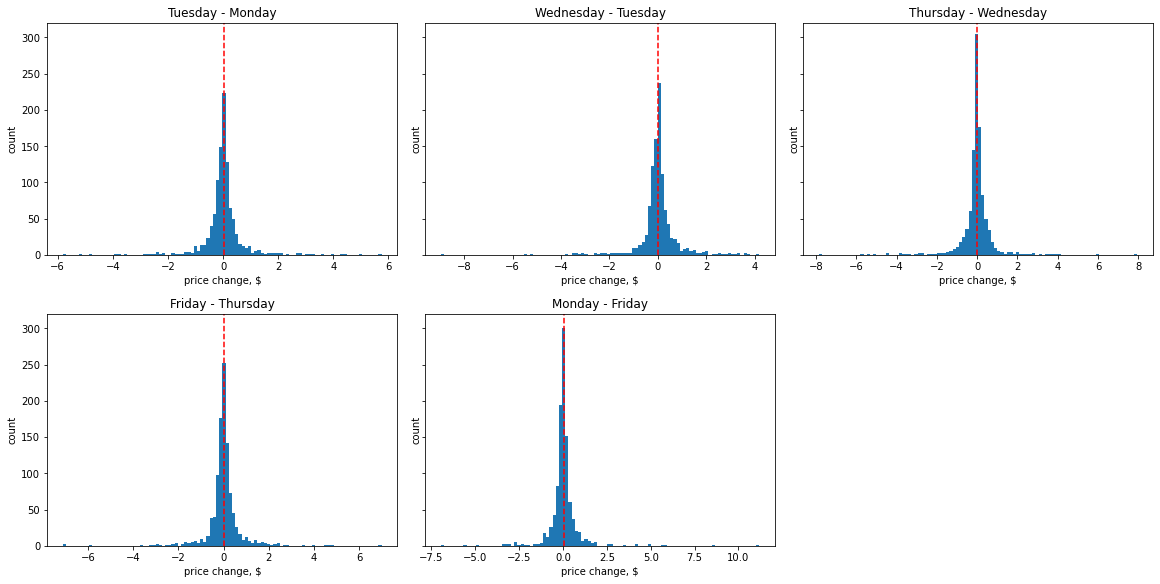

In [67]:
fig, ax = plt.subplots(2, 3, sharey=True, figsize=[16,8], constrained_layout=True);
# constrained_layout needed for spacing between subplots
ax[0,0].hist(d12.Diff, bins=100);
ax[0,0].set_title('Tuesday - Monday')
ax[0,0].set_xlabel('price change, $')
ax[0,0].set_ylabel('count')
ax[0,0].axvline(x=np.mean(d12.Diff), c='r', linestyle='--');

ax[0,1].hist(d23.Diff, bins=100);
ax[0,1].set_title('Wednesday - Tuesday')
ax[0,1].set_xlabel('price change, $')
ax[0,1].set_ylabel('count')
ax[0,1].axvline(x=np.mean(d23.Diff), c='r', linestyle='--');

ax[0,2].hist(d34.Diff, bins=100);
ax[0,2].set_title('Thursday - Wednesday')
ax[0,2].set_xlabel('price change, $')
ax[0,2].set_ylabel('count')
ax[0,2].axvline(x=np.mean(d34.Diff), c='r', linestyle='--');

ax[1,0].hist(d45.Diff, bins=100);
ax[1,0].set_title('Friday - Thursday')
ax[1,0].set_xlabel('price change, $')
ax[1,0].set_ylabel('count')
ax[1,0].axvline(x=np.mean(d45.Diff), c='r', linestyle='--');

ax[1,1].hist(d51.Diff, bins=100);
ax[1,1].set_title('Monday - Friday')
ax[1,1].set_xlabel('price change, $')
ax[1,1].set_ylabel('count')
ax[1,1].axvline(x=np.mean(d51.Diff), c='r', linestyle='--');

ax[1,2].axis('off')
plt.show()

At first glance, differences on consecutive working days seem to be normally distributed, but let's verify this.

#### Quantile-Quantile Plot

In [66]:
import statsmodels.api as sm

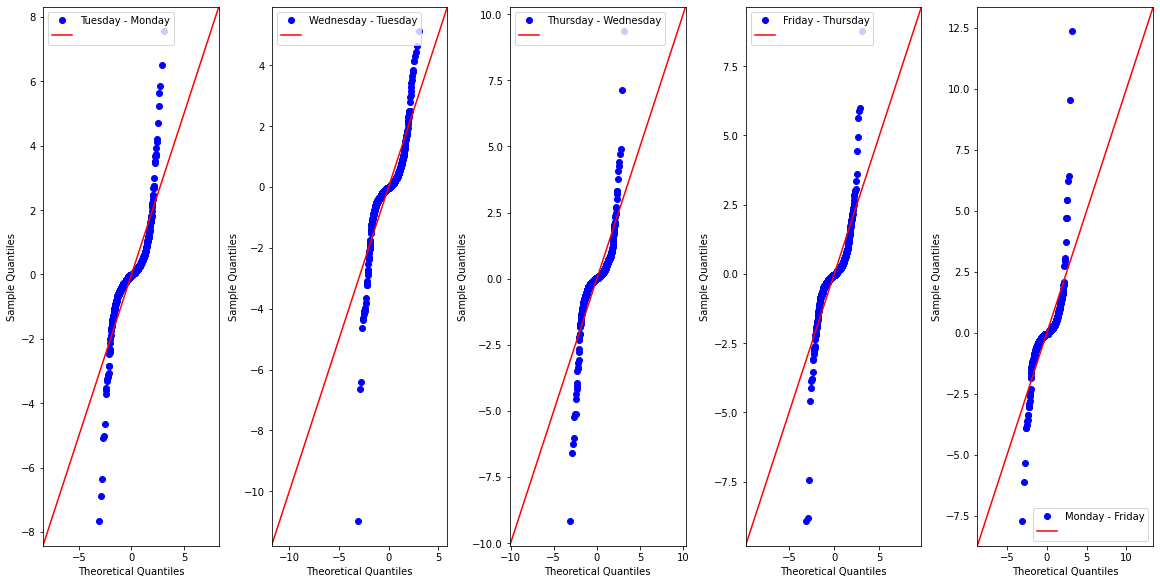

In [153]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=[16,8], constrained_layout=True) # create two subplots, one in each row

var = d12.Diff
var = (var - np.mean(var))/np.std(var) # Normalize
sm.qqplot(var, line ='45', ax=ax1)
#ax1.suptitle("Tuesday - Monday");
ax1.legend(['Tuesday - Monday',''])

var = d23.Diff
var = (var - np.mean(var))/np.std(var) # Normalize
sm.qqplot(var, line ='45', ax=ax2)
#ax2.suptitle("Wednesday - Tuesday");
ax2.legend(['Wednesday - Tuesday',''])

var = d34.Diff
var = (var - np.mean(var))/np.std(var) # Normalize
sm.qqplot(var, line ='45', ax=ax3)
#ax3.suptitle("Thursday - Wednesday");
ax3.legend(['Thursday - Wednesday',''])

var = d45.Diff
var = (var - np.mean(var))/np.std(var) # Normalize
sm.qqplot(var, line ='45', ax=ax4)
#ax4.suptitle("Friday - Thursday");
ax4.legend(['Friday - Thursday',''])

var = d51.Diff
var = (var - np.mean(var))/np.std(var) # Normalize
sm.qqplot(var, line ='45', ax=ax5)
#ax5.suptitle("Monday - Friday");
ax5.legend(['Monday - Friday',''])

plt.show()

Data are <i>not</i> normally distributed. <font color='red'>Can we still use the ANOVA test to compare several sets of price differences, given we have a large number of datapoints?</font>

#### ECDF
<font color='red'>

In [154]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data, axis=0)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

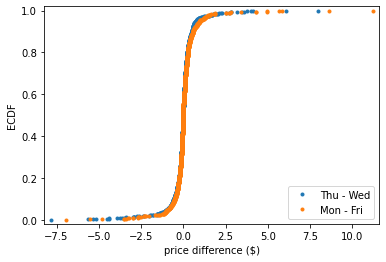

In [160]:
# Compute ECDFs
x_34, y_34 = ecdf(d34.Diff)
x_51, y_51 = ecdf(d51.Diff)

# Plot the ECDFs
_ = plt.plot(x_34, y_34, marker='.', linestyle='none')
_ = plt.plot(x_51, y_51, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('price difference ($)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('Thu - Wed', 'Mon - Fri'), loc='lower right')
plt.show()

ECDFs have a small difference for small positive values of price change.  Stock closing price change is often lower for Thursday - Wednesday than for Monday - Friday.

#### Parameter estimate using Bootstrapping <a href='#ref2'>[2]</a>: difference of mean price changes in two pairs of consecutive business days

In [164]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [165]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    bs_replicates = np.empty(size) # Initialize array of replicates

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [207]:
def bs_diff_ci(var1, var2, func, size=10000, cl=95):
    """var1, var2: groups of compared data,
    func: function to apply to each datapoint in both groups,
    size: no. of resamplings,
    cl: confidence level (95% by default)."""
    # difference of the sample function values
    func_diff = func(var2) - func(var1)
    # Get bootstrap replicates of function values
    bs_replicates_1 = draw_bs_reps(var1, func, size)
    bs_replicates_2 = draw_bs_reps(var2, func, size)
    # samples of difference of function values
    bs_diff_replicates = bs_replicates_2 - bs_replicates_1
    # confidence interval
    conf_int = np.percentile(bs_diff_replicates, [0.5*(100-cl), 0.5*(100+cl)])
    # Print the results
    print('difference of function values =', func_diff, '$')
    print(str(cl)+'% confidence interval =', conf_int, '$')

In [208]:
bs_diff_ci(d34.Diff, d51.Diff, np.mean) # two groups with largest difference

difference of function values = 0.05831939023653849 $
95% confidence interval = [-0.01562465  0.13357686] $


Let's narrow down the confidence interval by making 10 times more resamplings:

In [209]:
bs_diff_ci(d34.Diff, d51.Diff, np.mean, size=100000)

difference of function values = 0.05831939023653849 $
95% confidence interval = [-0.01655653  0.13403922] $


Same result: 0 is in the CI; therefore, we cannot claim that the mean values of price changes are different for the two pairs of consecutive business days.<br>
Let's compare all other pairs of business days. 

In [216]:
bs_diff_ci(d12.Diff, d12.Diff, np.mean) # for estimation of intrinsic variability

difference of function values = 0.0 $
95% confidence interval = [-0.06551252  0.06494268] $


In [212]:
bs_diff_ci(d12.Diff, d23.Diff, np.mean)

difference of function values = 0.0034016364754990043 $
95% confidence interval = [-0.06499771  0.06844794] $


In [210]:
bs_diff_ci(d12.Diff, d34.Diff, np.mean)

difference of function values = -0.04336755979337861 $
95% confidence interval = [-0.11211205  0.02560746] $


In [213]:
bs_diff_ci(d12.Diff, d45.Diff, np.mean)

difference of function values = -0.00017622221607602184 $
95% confidence interval = [-0.06823562  0.06640569] $


In [214]:
bs_diff_ci(d12.Diff, d51.Diff, np.mean)

difference of function values = 0.014951830443159876 $
95% confidence interval = [-0.05714933  0.0864263 ] $


In [217]:
bs_diff_ci(d23.Diff, d23.Diff, np.mean) # for estimation of intrinsic variability

difference of function values = 0.0 $
95% confidence interval = [-0.06998088  0.07045913] $


In [218]:
bs_diff_ci(d23.Diff, d34.Diff, np.mean)

difference of function values = -0.046769196268877614 $
95% confidence interval = [-0.11754111  0.02673627] $


In [219]:
bs_diff_ci(d23.Diff, d45.Diff, np.mean)

difference of function values = -0.003577858691575026 $
95% confidence interval = [-0.072542    0.06591679] $


In [220]:
bs_diff_ci(d23.Diff, d51.Diff, np.mean)

difference of function values = 0.011550193967660872 $
95% confidence interval = [-0.06140415  0.08881875] $


In [222]:
bs_diff_ci(d34.Diff, d34.Diff, np.mean) # for estimation of intrinsic variability

difference of function values = 0.0 $
95% confidence interval = [-0.07487251  0.07282123] $


In [223]:
bs_diff_ci(d34.Diff, d45.Diff, np.mean)

difference of function values = 0.04319133757730259 $
95% confidence interval = [-0.02680113  0.1138504 ] $


In [224]:
bs_diff_ci(d34.Diff, d51.Diff, np.mean)

difference of function values = 0.05831939023653849 $
95% confidence interval = [-0.01526823  0.13325154] $


In [225]:
bs_diff_ci(d45.Diff, d45.Diff, np.mean) # for estimation of intrinsic variability

difference of function values = 0.0 $
95% confidence interval = [-0.06780909  0.06757919] $


In [226]:
bs_diff_ci(d45.Diff, d51.Diff, np.mean)

difference of function values = 0.015128052659235898 $
95% confidence interval = [-0.05724673  0.08843706] $


In [227]:
bs_diff_ci(d51.Diff, d51.Diff, np.mean) # for estimation of intrinsic variability

difference of function values = 0.0 $
95% confidence interval = [-0.07829745  0.07856455] $


#### Hypothesis testing using Bootstrap <a href='#ref3'>[3]</a>: Are mean price changes same for different pairs of consecutive business days?
The ECDF plot and the value of the difference of mean price changes suggest that the distributions of stock closing price changes are different for different pairs of consecutive business days, although this is not supported by the above bootstrap estimates of the mean differences. Is this difference just due to a random chance? In other words, what is the probability that the observed differences in mean price changes are zeros?

Be careful! The hypothesis we are testing is <i>not</i> that the stock price changes come from the same distribution for different pairs of consecutive business days. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [282]:
def bs_test(var1, var2, size=10000):
    """Hypothesis testing for difference of mean values with Bootstrap, one-tailed.
    var1, var2: groups of compared data,
    size: no. of resamplings."""
    diff_means = np.mean(var2) - np.mean(var1)
    print("diff_means =",diff_means)
    # mean of combined data set
    combined_mean = np.mean(np.concatenate((var1, var2)))
    # Shift the samples
    var1_shifted = var1 - np.mean(var1) + combined_mean
    var2_shifted = var2 - np.mean(var2) + combined_mean
    # bootstrap replicates of shifted data sets
    bs_replicates_1 = draw_bs_reps(var1_shifted, np.mean, size)
    bs_replicates_2 = draw_bs_reps(var2_shifted, np.mean, size)
    # replicates of difference of means
    bs_diff_replicates = bs_replicates_2 - bs_replicates_1
    # p-value, one-tailed
    if mean_diff <= 0:
        p = np.sum(bs_diff_replicates <= diff_means) / len(bs_diff_replicates)
    else:
        p = np.sum(bs_diff_replicates >= diff_means) / len(bs_diff_replicates)
    print('p =', p)
    if(p>=0.05):
        print("Failed to reject H0. Difference of means could be 0.")
    else:
        print("Reject H0. Difference of means is non-zero.")

In [251]:
bs_test(d12.Diff, d12.Diff) # verification

diff_means = 0.0
p =  0.5074
Failed to reject H0. Difference of means could be 0.


In [252]:
bs_test(d12.Diff, d23.Diff)

diff_means = 0.0034016364754990043
p =  0.4604
Failed to reject H0. Difference of means could be 0.


In [253]:
bs_test(d12.Diff, d34.Diff)

diff_means = -0.04336755979337861
p =  0.8866
Failed to reject H0. Difference of means could be 0.


In [254]:
bs_test(d12.Diff, d45.Diff)

diff_means = -0.00017622221607602184
p =  0.4996
Failed to reject H0. Difference of means could be 0.


In [255]:
bs_test(d12.Diff, d51.Diff)

diff_means = 0.014951830443159876
p =  0.3411
Failed to reject H0. Difference of means could be 0.


In [256]:
bs_test(d23.Diff, d23.Diff) # verification

diff_means = 0.0
p =  0.4953
Failed to reject H0. Difference of means could be 0.


In [257]:
bs_test(d23.Diff, d34.Diff)

diff_means = -0.046769196268877614
p =  0.8997
Failed to reject H0. Difference of means could be 0.


In [258]:
bs_test(d23.Diff, d45.Diff)

diff_means = -0.003577858691575026
p =  0.545
Failed to reject H0. Difference of means could be 0.


In [259]:
bs_test(d23.Diff, d51.Diff)

diff_means = 0.011550193967660872
p =  0.3826
Failed to reject H0. Difference of means could be 0.


In [260]:
bs_test(d34.Diff, d34.Diff) # verification

diff_means = 0.0
p =  0.4941
Failed to reject H0. Difference of means could be 0.


In [261]:
bs_test(d34.Diff, d45.Diff)

diff_means = 0.04319133757730259
p =  0.1109
Failed to reject H0. Difference of means could be 0.


In [262]:
bs_test(d34.Diff, d51.Diff)

diff_means = 0.05831939023653849
p =  0.061
Failed to reject H0. Difference of means could be 0.


In [263]:
bs_test(d45.Diff, d45.Diff) # verification

diff_means = 0.0
p =  0.4959
Failed to reject H0. Difference of means could be 0.


In [264]:
bs_test(d45.Diff, d51.Diff)

diff_means = 0.015128052659235898
p =  0.3356
Failed to reject H0. Difference of means could be 0.


In [265]:
bs_test(d51.Diff, d51.Diff) # verification

diff_means = 0.0
p =  0.5055
Failed to reject H0. Difference of means could be 0.


Conclusion: there is no statistical evidence that the means of price changes differ between all pairs of consecutive business days.

#### Permutation test: do price changes have the same distribution for different pairs of consecutive business days?
There is no statistically significant defference in the mean price changes on the next business day across the week. It could be that the observed changes are just random fluctuations and there is no reliable trading strategy regarding on which day of the week to buy and sell the stock. To test this hypothesis of no next-day change, we do a pairs permutation test <a href='#ref4'>[4]</a>.

In [287]:
def permut_test(var1, var2, size=10000):
    n = min(len(var1), len(var2))
    diff_means = np.mean(var2) - np.mean(var1)
    print("diff_means =",diff_means)
    # Initialize array of replicates
    perm_replicates = np.empty(size)
    # Draw replicates
    for i in range(size):
        # Permute var1
        var1_permuted = np.random.permutation(var1)
        perm_replicates[i] = np.mean(var1_permuted[:n-1] - var2[:n-1])
    # Calculate p-value
    p = np.sum(np.abs(perm_replicates) >= np.abs(diff_means)) / len(perm_replicates)
    print('p =', p)
    if(p>=0.05):
        print("Failed to reject H0. Two distributions could be same.")
    else:
        print("Reject H0. Two distributions are different.")

In [288]:
permut_test(d12.Diff, d12.Diff) # verification

diff_means = 0.0
p = 1.0
Failed to reject H0. Two distributions could be same.


In [289]:
permut_test(d12.Diff, d23.Diff)

diff_means = 0.0034016364754990043
p = 0.9844
Failed to reject H0. Two distributions could be same.


In [290]:
permut_test(d12.Diff, d34.Diff)

diff_means = -0.04336755979337861
p = 1.0
Failed to reject H0. Two distributions could be same.


In [291]:
permut_test(d12.Diff, d34.Diff)

diff_means = -0.04336755979337861
p = 1.0
Failed to reject H0. Two distributions could be same.


In [292]:
permut_test(d12.Diff, d45.Diff)

diff_means = -0.00017622221607602184
p = 1.0
Failed to reject H0. Two distributions could be same.


In [294]:
permut_test(d12.Diff, d51.Diff, 100000)

diff_means = 0.014951830443159876
p = 0.0566
Failed to reject H0. Two distributions could be same.


In [298]:
permut_test(d23.Diff, d34.Diff)

diff_means = -0.046769196268877614
p = 0.8527
Failed to reject H0. Two distributions could be same.


In [299]:
permut_test(d23.Diff, d45.Diff)

diff_means = -0.003577858691575026
p = 0.2137
Failed to reject H0. Two distributions could be same.


In [300]:
permut_test(d23.Diff, d51.Diff)

diff_means = 0.011550193967660872
p = 0.3371
Failed to reject H0. Two distributions could be same.


In [302]:
permut_test(d34.Diff, d45.Diff)

diff_means = 0.04319133757730259
p = 0.6261
Failed to reject H0. Two distributions could be same.


In [303]:
permut_test(d34.Diff, d51.Diff)

diff_means = 0.05831939023653849
p = 0.3831
Failed to reject H0. Two distributions could be same.


In [306]:
permut_test(d45.Diff, d51.Diff)

diff_means = 0.015128052659235898
p = 0.2957
Failed to reject H0. Two distributions could be same.


Conclusion: Permutation test also does not detect significant differences between groups of next-day price changes.

## References
<a id='ref1'>[1]</a> Financial Data API. https://data.nasdaq.com/tools/api

<a id='ref2'>[2]</a> DataCamp course "Statistical Thinking in Python (Part 2)", section 5 "Putting it all Together: a Case Study", Exercise 4. https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/putting-it-all-together-a-case-study?ex=4

<a id='ref3'>[3]</a> DataCamp course "Statistical Thinking in Python (Part 2)", section 5 "Putting it all Together: a Case Study", Exercise 5. https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/putting-it-all-together-a-case-study?ex=5

<a id='ref4'>[4]</a> DataCamp course "Statistical Thinking in Python (Part 2)", section 5 "Putting it all Together: a Case Study", Exercise 17. https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/putting-it-all-together-a-case-study?ex=17

In [ ]:
Financial Econometrics
* Application of statistical method in Financial Market Data
* Risk management, Quantitative trading, Pricing, Portfolio management, Corporate Finance

Popular modelling techniques in FE:
    * ARIMA
    * Vector Auto Regression
    * MCMC
    * Error correction model
    * ARCH/GARCH
    * Regression

Journals: Econometrica, J. of Econometrics, J. of Business and Economic Statistics, J. of Financial Econometrics

In [ ]:
TSA simplilearn
https://www.youtube.com/watch?v=chp71nEc320

MA
https://www.youtube.com/watch?v=r71hWIUscV4

AR vs MA
https://www.youtube.com/watch?v=2kmBRH0caBA

https://www.youtube.com/watch?v=3sH1kisAK9s
    Time Series Data Analysis and Exploratory Analysis - A Deep Dive
    
https://www.youtube.com/watch?v=v5ijNXvlC5A
    
https://www.youtube.com/watch?v=4FmVIpcwl4k
https://www.youtube.com/watch?v=0wfOOl5XtcU
    https://www.youtube.com/watch?v=e8Yw4alG16Q
        

    




############################################
ARIMA

ARIMA in Python - Time Series Forecasting Part 2 - Datamites Data Science Projects
102943
https://www.youtube.com/watch?v=D9y6dcy0xK8

ARIMA Models
56305
https://www.youtube.com/watch?v=0xHf-SJ9Z9U
        
Time Series Analysis and Forecasting - Forecasting Sales in Python - ARIMA, AR, MA models theory
32160
https://www.youtube.com/watch?v=1KGcmLP65uo

ARIMA in python. Best way to Identify p d q. Time Serie Forecasting. With Example. Free Notes.
6142
https://www.youtube.com/watch?v=_qv_7lEuiZg

############################################
AutoARIMA
https://www.youtube.com/watch?v=MngVV_4l9Po

ARIMA, SARIMAX
https://www.youtube.com/watch?v=2XGSIlgUBDI

Facebook Prophet
https://www.youtube.com/watch?v=95-HMzxsghY

### ACF, PACF
Time Series Talk : Autocorrelation and Partial Autocorrelation
172784
https://www.youtube.com/watch?v=DeORzP0go5I

https://www.youtube.com/watch?v=y8opUEd05Dg
    
### TSA

Lecture 13 Time Series Analysis
189317
https://www.youtube.com/watch?v=Prpu_U5tKkE

Maths Tutorial: Patterns and Trends in Time Series Plots (statistics)
135762
https://www.youtube.com/watch?v=ca0rDWo7IpI

Time Series Analysis
96560
https://www.youtube.com/watch?v=BBoUJYT0jxY&list=RDLVBBoUJYT0jxY&index=1

https://www.youtube.com/watch?v=MmC4b7gPY0Q
61185
Time Series Analysis in Python | Time Series Forecasting Project [Complete] | Python Data Science

https://www.youtube.com/watch?v=chp71nEc320
18561
https://www.youtube.com/watch?v=chp71nEc320

### Long Short Term Memory neural network
Stock Price Prediction Using Python & Machine Learning
788336
https://www.youtube.com/watch?v=QIUxPv5PJOY


### Extra plots

In [ ]:
# Compute ECDFs
x_Monday, y_Monday = ecdf(arrMonday)
x_Tuesday, y_Tuesday = ecdf(arrTuesday)

# Plot the ECDFs
_ = plt.plot(x_Monday, y_Monday, marker='.', linestyle='none')
_ = plt.plot(x_Tuesday, y_Tuesday, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('price ($)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('Monday', 'Tuesday'), loc='lower right')

# Show the plot
plt.show()

In [ ]:
np.mean(d12.Diff)
np.mean(d23.Diff)

In [ ]:
# Compute ECDFs
x_Wednesday, y_Wednesday = ecdf(arrWednesday)
x_Thursday, y_Thursday = ecdf(arrThursday)
x_Friday, y_Friday = ecdf(arrFriday)

# Plot the ECDFs
_ = plt.plot(x_Wednesday, y_Wednesday, marker='.', linestyle='none')
_ = plt.plot(x_Thursday, y_Thursday, marker='.', linestyle='none')
_ = plt.plot(x_Friday, y_Friday, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('price ($)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('Wednesday', 'Thursday', 'Friday'), loc='lower right')

# Show the plot
plt.show()

In [ ]:
ECDFs are almost indistinguishable.
Well, it looks like we need a paired difference test, and not the teast of difference of means.

##### Difference of stock prices within same week

In [163]:
n_weeks = min({len(arrMonday), len(arrTuesday), len(arrWednesday), len(arrThursday), len(arrFriday)})
n_weeks # length of the shortest time series

NameError: name 'arrMonday' is not defined

In [ ]:
# What was the 1st date?
from datetime import datetime # To manually create dates
date0_str = TS.iloc[0].Date # first date with recorded closing price
date0 = pd.Timestamp(date0_str)
print("First date:", date0, date0.day_name())

In [ ]:
# Let's start from 2nd week for Wednesday - Friday
d12 = arrTuesday[:n_weeks] - arrMonday[:n_weeks]

In [ ]:
len(d12)

In [ ]:
arrTuesday[0]

In [ ]:
TS.head(5)

In [ ]:
plt.hist(d12, bins=30); # left-skewed: on Tuesdays often lower closing price than on Mondays
plt.title("Tuesday - Monday in the same week");
plt.xlabel("price change, $")
plt.ylabel("count")
np.mean(d12)

Looks like mean of differences within same week is negative. Before testing this, we have to check the normality of the differences.

In [ ]:
var = d12
# Normalize
var_mean = np.mean(var)
var_sd = np.std(var)
var = (var - var_mean)/var_sd
import statsmodels.api as sm
sm.qqplot(var, line ='45');

Differences Tuesday - Monday are not normal.

In [ ]:
#### Hypothesis test: Are mean values same on different days of week?
The ECDF plot and the confidence interval make it clear that the distributions of stock closing prices on Mondays and Tuesdays are same. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

Be careful! The hypothesis we are testing is <i>not</i> that the stock prices come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

mean_diff

# Compute mean of combined data set
combined_mean = np.mean(np.concatenate((arrMonday, arrTuesday)))

# Shift the samples
bd_Monday_shifted = arrMonday - np.mean(arrMonday) + combined_mean
bd_Tuesday_shifted = arrTuesday - np.mean(arrTuesday) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_Monday = draw_bs_reps(bd_Monday_shifted, np.mean, 10000)
bs_replicates_Tuesday = draw_bs_reps(bd_Tuesday_shifted, np.mean, 10000)

# Compute replicates of difference of means
bs_diff_replicates = bs_replicates_Tuesday - bs_replicates_Monday

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p = ', p)

Conclusion: there is no statistical evidence that the mean stock prices differ between Mondays and Tuesdays.

Back to differences, which are more representative, since they are taken between prices within same week and not collected over entire history. Let's perform test of d12 mean.

np.mean(arrMonday)

np.mean(arrTuesday)